In [1]:
import pandas as pd

In [2]:
df_human = pd.read_csv("output/samples/en/phase_3/human_eval.tsv", sep="\t")
df_human = df_human[df_human["annotator"] == "Laura"]
df_human = df_human.rename(columns={"doc_id": "filenameid"})

In [3]:
df_auto = pd.read_csv("output/samples/en/phase_3/auto_eval.tsv", sep="\t")

In [4]:
# df_model = pd.read_csv("output/samples/en/phase_3/prometheus_evaluation.tsv", sep="\t")
df_model = pd.read_csv("output/samples/en/phase_3/llama_3B_inst_std_prompt_evaluation.tsv", sep="\t")

In [5]:
df_model

,filenameid,clinical_case,discharge_summary,human_score,auto_score,feedbacks,scores
0,31668014,A 67‐year‐old man treated with hemodialysis wa...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.6551724137931034, 'recall': 0....",{'Medical Entities Completeness': 'The provide...,"{'Medical Entities Completeness': 4, 'Structur..."
1,32864940,"GSA, male, 55 years old, white, forklift opera...",**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 3, 'Structur...","{'precision': 0.5714285714285714, 'recall': 0....",{'Medical Entities Completeness': 'The provide...,"{'Medical Entities Completeness': 4, 'Structur..."
2,35414581,Patient information\nA woman in her 70s diagno...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.5384615384615384, 'recall': 0....","{'Medical Entities Completeness': ""The respons...","{'Medical Entities Completeness': 4, 'Structur..."
3,29399767,A 54-year-old male had had a HeartMate 3™ impl...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 5, 'Structur...","{'precision': 0.5, 'recall': 0.333333333333333...",{'Medical Entities Completeness': 'The respons...,"{'Medical Entities Completeness': 4, 'Structur..."
4,31056078,"Initial presentation\nA 55-year-old, Caucasian...",**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 2, 'Structur...","{'precision': 0.6, 'recall': 0.466666666666666...","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 5, 'Structur..."
5,33544806,Clinical history\n\nFour years before the admi...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 2, 'Structur...","{'precision': 0.2, 'recall': 0.333333333333333...","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 5, 'Structur..."
6,29899452_1,The patient was a 29-year-old man with PIK3CA ...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.59375, 'recall': 0.57575757575...","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 5, 'Structur..."
7,32305569,Our case patient is a 66-year-old man with a h...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.4888888888888889, 'recall': 0....","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 4, 'Structur..."
8,32351016_1,A 73‐year‐old female patient was hospitalized ...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.48, 'recall': 0.36363636363636...","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 4, 'Structur..."
9,33782774,"A 20-year-old man (height: 138 cm, weight: 39 ...",**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 2, 'Structur...","{'precision': 0.5757575757575758, 'recall': 0....","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 5, 'Structur..."


In [10]:
prompt = """
instruction = 
One of the main bottlenecks for the development of clinical NLP resources if the lack of access to clinical records due to data privacy issues. This is particularly true for developments beyond English, as most of the accessible anonymized clinical record datasets are only available for this language.
To examine if clinical case report publications could potentially be considered as a data source to generate synthetic clinical discharge summaries by means of generative AI solutions, prompt instructions combined with automatic clinical were applied.
This structured summary has the purpose to systematically characterize the clinical language characteristics of synthetic discharge summaries.
Each discharge summary was assessed for a predefined set of features.

The possible scores are 1, 2, 3, 4 and 5, where 1 is the lowest and 5 is the highest score. Try to be as objective as possible and provide a score that reflects the quality of the discharge summary.

rubric_data = {
    "Medical Entities Completeness": {
        "criteria": "Does the discharge summary (DS) include all medical entities (diseases, medications, procedures) originally in the CC? (Amount of entities in DS that are also in CC)",
        "score1_description": "<50% of relevant entities are included",
        "score2_description": "50% - 65% of relevant entities are included",
        "score3_description": "65% - 80% of relevant entities are included",
        "score4_description": "80% - 95% of relevant entities are included",
        "score5_description": "95% - 100% of relevant entities are included",
    },
    "Structure - Headers": {
        "criteria": "Does the discharge summary (DS) contain the typical sections? (e.g. patient information/history, physical examination, clinical findings, symptoms, signs, diagnostic assessment/diagnosis, therapeutic interventions/treatment, outcomes and follow up)",
        "score1_description": "Most of the important sections are missing",
        "score2_description": "At least 2 of the most important section headers are missing",
        "score3_description": "Section headers are correct but not in natural order",
        "score4_description": "The main section headers are included but some irrelevant ones have been included",
        "score5_description": "The section headers make sense and correspond to the ones expected in a real discharge summary"
    },
    "Structure - Content": {
        "criteria": "Is the content in the discharge summary sections correct?",
        "score1_description": "Sections are very short or almost empty",
        "score2_description": "At least 2 section headers don't correspond to the expected content for that header",
        "score3_description": "At least 1 section header doesn't correspond to the expected content for that header",
        "score4_description": "Information is well structured but information is too short in at least 1 case",
        "score5_description": "Information is correctly assigned to each section"
    },
    "Content Accuracy": {
        "criteria": "Does the discharge summary (DS) accurately reflect the clinical entities (findings, diseases, signs and symptoms) provided in the clinical case report (CC)?",
        "score1_description": "Overall, the content in DS is more concrete than in the CC",
        "score2_description": "Overall, the content in DS is more general than in the CC",
        "score3_description": "There are 2 or more clinical entities that are not completely accurate",
        "score4_description": "There are 1 or more clinical entities that are not completely accurate",
        "score5_description": "All the clinical entities are accurate"
    },
    "Made-up Content": {
        "criteria": "Does the discharge summary (DS) include additional patient's medical situation information not described in the clinical case (CC)? (Fabricated content)",
        "score1_description": "It made up 2 or more medicament dosage or disease severity",
        "score2_description": "It made up 1 or more medicament dosage or disease severity",
        "score3_description": "It made up information about the patient",
        "score4_description": "It made up irrelevant information",
        "score5_description": "It didn't make anything up"
    },
    "Overall Quality": {
        "criteria": "How would you rate the overall quality of the summary?",
        "score1_description": "It completely failed all the assessments",
        "score2_description": "Failed 3 of the previous aspects",
        "score3_description": "Failed 2 of the previous aspects",
        "score4_description": "Failed 1 of the previous aspects",
        "score5_description": "It is complete, well structured, accurate and without made‑up content"
    }
}

###Task Description:
An instruction (might include an Input inside it), a response to evaluate, a reference answer that gets a score of 5, and a score rubric representing a evaluation criteria are given.
1. Write a detailed feedback that assess the quality of the response strictly based on the given score rubric, not evaluating in general.
2. After writing a feedback, write a score that is an integer between 1 and 5. You should refer to the score rubric.
3. The output format should look as follows: "{{'feedback': <feedback>, 'score': <number from 1 to 5>}}".
4. Please do not generate any other opening, closing, and explanations.

###The instruction to evaluate:
{instruction}

###Response to evaluate:
{response}

###Reference Answer (Score 5):
{reference_answer}

###Score Rubrics:
{rubric}

###Feedback: 
"""

In [13]:
for idx, row in df_model.iterrows():

    print("# Filenameid\n", row["filenameid"])
    print("# Response\n", row["discharge_summary"])
    print("\n")
    print("# Reference Answer\n", row["clinical_case"])
    print(prompt)
    print("=" * 80)


# Filenameid
 31668014
# Response
 **Discharge Summary**

**Patient Information:**
- **Name:** [Patient Name]
- **Age:** 67 years
- **Gender:** Male

**Admission Date:** [Admission Date]  
**Discharge Date:** [Discharge Date]  
**Diagnosis:** Worsening heart failure with reduced ejection fraction (EF)

**Medical History:**
- Anterior ST-elevation myocardial infarction (STEMI) 18 years ago, treated with percutaneous coronary intervention (PCI) of the proximal left anterior descending (LAD) artery.
- History of coronary artery disease, diabetes Type 2, hypercholesterolemia, and former smoker.
- Coronary angiography 10 years ago revealed occlusion of the LAD and right coronary artery (RCA), leading to bypass grafting with left internal mammary artery (LIMA) to LAD and saphenous vein graft to RCA.
- Posterolateral STEMI 5 years ago due to circumflex (CX) occlusion, treated with PCI, complicated by acute pulmonary edema and hypotension.

**Current Condition:**
- Severe left ventricular (LV)

In [15]:
print(df_model.iloc[0]["human_score"])

{'Medical Entities Completeness': 4, 'Structure - Headers': 5, 'Structure - Content': 4, 'Content Accuracy': 2, 'Made-up Content': 4, 'Overall Quality': 2, 'Feedback': "Diagnosis:** Worsening heart failure with reduced ejection fraction (EF). Is missing that patient was on hemodialysis\nSevere left ventricular (LV) dysfunction with EF of 35% and high filling pressures. ( Is 34% not 35%) \n- Moderate renal impairment with estimated glomerular filtration rate (eGFR) of 40 ml/min per 1.73 m². ( is 52ml/min not 40 ml/min)40ml/min is in another paragraph\nThere's important information that is missing related to heart failure. "}


In [16]:
df_human

,filenameid,annotator,Key Information CC,Key Information DS,Medical Entities Completeness,Structure - Headers,Structure - Content,Content Accuracy,Made-up Content,Coherence,Overall Quality,Feedback
0,27198691,Laura,"['symptoms, signs and clinical findings', 'dis...","['symptoms, signs and clinical findings', 'dis...",5,5,5,5,5,False,5,The only thing I wanted to comment on is the d...
1,29399767,Laura,"['symptoms, signs and clinical findings', 'dis...","['symptoms, signs and clinical findings', 'dis...",5,5,5,4,4,False,4,The final section Discharge instructions has b...
2,29877258,Laura,"['symptoms, signs and clinical findings', 'dis...","['symptoms, signs and clinical findings', 'dis...",4,5,5,3,1,False,3,There are missing data of some clinical proced...
3,29899452_1,Laura,"['symptoms, signs and clinical findings', 'dis...","['symptoms, signs and clinical findings', 'dis...",4,3,3,3,2,False,2,DS has confused the diagnoses with the medical...
4,30170386,Laura,"['symptoms, signs and clinical findings', 'dis...","['symptoms, signs and clinical findings', 'sex...",5,4,5,4,4,False,2,Diagnosis:** Cutaneous Sarcoidosis (CS). This...
5,30567249,Laura,"['diseases and co-morbidities', 'clinical proc...","['sex', 'age', 'clinical procedures', 'disease...",5,4,5,5,4,False,3,The recommendations in DS are out place becaus...
6,30633184,Laura,"['symptoms, signs and clinical findings', 'dis...","['symptoms, signs and clinical findings', 'dis...",5,5,5,5,5,False,4,**Chief Complaint:** usually this section is n...
7,30700635,Laura,"['clinical procedures', 'sex', 'age']","['clinical procedures', 'sex', 'age']",5,5,5,5,4,False,4,It made up the final section of follow-up
8,30971480_1,Laura,"['clinical procedures', 'sex', 'age', 'symptom...","['clinical procedures', 'sex', 'age', 'past me...",5,5,5,5,4,False,4,It made up the **Discharge Condition:** and *...
9,31056078,Laura,"['clinical procedures', 'sex', 'age', 'symptom...","['sex', 'age', 'past medical conditions', 'med...",2,2,1,3,4,False,2,In the DS is missing some information about fa...


In [17]:
df_comp = df_model.merge(df_human, on="filenameid")
df_comp

,filenameid,clinical_case,discharge_summary,human_score,auto_score,feedbacks,scores,annotator,Key Information CC,Key Information DS,Medical Entities Completeness,Structure - Headers,Structure - Content,Content Accuracy,Made-up Content,Coherence,Overall Quality,Feedback
0,31668014,A 67‐year‐old man treated with hemodialysis wa...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.6551724137931034, 'recall': 0....",{'Medical Entities Completeness': 'The provide...,"{'Medical Entities Completeness': 4, 'Structur...",Laura,"['symptoms, signs and clinical findings', 'dis...","['symptoms, signs and clinical findings', 'dis...",4,5,4,2,4,False,2,Diagnosis:** Worsening heart failure with redu...
1,32864940,"GSA, male, 55 years old, white, forklift opera...",**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 3, 'Structur...","{'precision': 0.5714285714285714, 'recall': 0....",{'Medical Entities Completeness': 'The provide...,"{'Medical Entities Completeness': 4, 'Structur...",Laura,"['symptoms, signs and clinical findings', 'dis...","['symptoms, signs and clinical findings', 'dis...",3,5,3,3,4,False,2,DS miss the duration of symptoms. In section m...
2,35414581,Patient information\nA woman in her 70s diagno...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.5384615384615384, 'recall': 0....","{'Medical Entities Completeness': ""The respons...","{'Medical Entities Completeness': 4, 'Structur...",Laura,"['symptoms, signs and clinical findings', 'dis...","['symptoms, signs and clinical findings', 'dis...",4,5,4,5,5,False,5,DS missed some information about the electroni...
3,29399767,A 54-year-old male had had a HeartMate 3™ impl...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 5, 'Structur...","{'precision': 0.5, 'recall': 0.333333333333333...",{'Medical Entities Completeness': 'The respons...,"{'Medical Entities Completeness': 4, 'Structur...",Laura,"['symptoms, signs and clinical findings', 'dis...","['symptoms, signs and clinical findings', 'dis...",5,5,5,4,4,False,4,The final section Discharge instructions has b...
4,31056078,"Initial presentation\nA 55-year-old, Caucasian...",**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 2, 'Structur...","{'precision': 0.6, 'recall': 0.466666666666666...","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 5, 'Structur...",Laura,"['clinical procedures', 'sex', 'age', 'symptom...","['sex', 'age', 'past medical conditions', 'med...",2,2,1,3,4,False,2,In the DS is missing some information about fa...
5,33544806,Clinical history\n\nFour years before the admi...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 2, 'Structur...","{'precision': 0.2, 'recall': 0.333333333333333...","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 5, 'Structur...",Laura,"['symptoms, signs and clinical findings', 'dis...","['symptoms, signs and clinical findings', 'dis...",2,4,1,2,4,False,3,"The DS is very summarized, with important info..."
6,29899452_1,The patient was a 29-year-old man with PIK3CA ...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.59375, 'recall': 0.57575757575...","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 5, 'Structur...",Laura,"['symptoms, signs and clinical findings', 'dis...","['symptoms, signs and clinical findings', 'dis...",4,3,3,3,2,False,2,DS has confused the diagnoses with the medical...
7,32305569,Our case patient is a 66-year-old man with a h...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.4888888888888889, 'recall': 0....","{'Medical Entities Completene

In [18]:
# Agreement in Medical Completeness
field = 'Overall Quality'
from sklearn.metrics import cohen_kappa_score

def compute_agreement(field, iaa_fun=cohen_kappa_score):
    
    # expert_annotations = df_comp["human_score"].apply(lambda x: eval(x)[field]).values
    expert_annotations = df_comp[field].values
    llm_annotations = df_comp["scores"].apply(lambda x: eval(x)[field]).values

    kappa = iaa_fun(expert_annotations, llm_annotations)
    print(f"[{field}] Cohen's Kappa: {kappa:.4f}")
    return kappa

cols_score = ['Medical Entities Completeness', 'Structure - Headers',
                'Structure - Content', 'Content Accuracy', 
                'Made-up Content', 'Overall Quality']

ls_kappa = []
for col in cols_score:
    kappa = compute_agreement(col)
    ls_kappa.append(kappa)

[Medical Entities Completeness] Cohen's Kappa: -0.0676
[Structure - Headers] Cohen's Kappa: 0.1379
[Structure - Content] Cohen's Kappa: -0.1034
[Content Accuracy] Cohen's Kappa: -0.1667
[Made-up Content] Cohen's Kappa: 0.1667
[Overall Quality] Cohen's Kappa: 0.1000


In [19]:
f1_scores = df_comp["auto_score"].apply(lambda x: eval(x)["f1"]).values
print(f"F1 Score: {f1_scores.mean():.4f} +/- {f1_scores.std():.4f}")

F1 Score: 0.5900 +/- 0.1709


In [20]:
df_model

,filenameid,clinical_case,discharge_summary,human_score,auto_score,feedbacks,scores
0,31668014,A 67‐year‐old man treated with hemodialysis wa...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.6551724137931034, 'recall': 0....",{'Medical Entities Completeness': 'The provide...,"{'Medical Entities Completeness': 4, 'Structur..."
1,32864940,"GSA, male, 55 years old, white, forklift opera...",**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 3, 'Structur...","{'precision': 0.5714285714285714, 'recall': 0....",{'Medical Entities Completeness': 'The provide...,"{'Medical Entities Completeness': 4, 'Structur..."
2,35414581,Patient information\nA woman in her 70s diagno...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.5384615384615384, 'recall': 0....","{'Medical Entities Completeness': ""The respons...","{'Medical Entities Completeness': 4, 'Structur..."
3,29399767,A 54-year-old male had had a HeartMate 3™ impl...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 5, 'Structur...","{'precision': 0.5, 'recall': 0.333333333333333...",{'Medical Entities Completeness': 'The respons...,"{'Medical Entities Completeness': 4, 'Structur..."
4,31056078,"Initial presentation\nA 55-year-old, Caucasian...",**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 2, 'Structur...","{'precision': 0.6, 'recall': 0.466666666666666...","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 5, 'Structur..."
5,33544806,Clinical history\n\nFour years before the admi...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 2, 'Structur...","{'precision': 0.2, 'recall': 0.333333333333333...","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 5, 'Structur..."
6,29899452_1,The patient was a 29-year-old man with PIK3CA ...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.59375, 'recall': 0.57575757575...","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 5, 'Structur..."
7,32305569,Our case patient is a 66-year-old man with a h...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.4888888888888889, 'recall': 0....","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 4, 'Structur..."
8,32351016_1,A 73‐year‐old female patient was hospitalized ...,**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 4, 'Structur...","{'precision': 0.48, 'recall': 0.36363636363636...","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 4, 'Structur..."
9,33782774,"A 20-year-old man (height: 138 cm, weight: 39 ...",**Discharge Summary**\n\n**Patient Information...,"{'Medical Entities Completeness': 2, 'Structur...","{'precision': 0.5757575757575758, 'recall': 0....","{'Medical Entities Completeness': ""The provide...","{'Medical Entities Completeness': 5, 'Structur..."


In [31]:
import scipy
# field = 'Medical Entities Completeness'
f1_scores = df_comp["auto_score"].apply(lambda x: eval(x)["f1"]).values
precision_scores = df_comp["auto_score"].apply(lambda x: eval(x)["precision"]).values
recall_scores = df_comp["auto_score"].apply(lambda x: eval(x)["recall"]).values

for field in cols_score:
    # expert_annotations = df_model["human_score"].apply(lambda x: eval(x)[field]).values
    expert_annotations = df_comp[field].values
    llm_annotations = df_comp["scores"].apply(lambda x: eval(x)[field]).values

    print("HUMAN:\t", expert_annotations)
    print("LLM:\t", llm_annotations)
    kappa = cohen_kappa_score(expert_annotations, llm_annotations, weights='linear', labels=[1, 2, 3, 4, 5])
    print(f"[{field}] Cohen's Kappa: {kappa:.4f}")
    spearman = scipy.stats.spearmanr(expert_annotations, llm_annotations)
    print(f"[{field}] Spearman's Rho: {spearman.correlation:.4f} (p-value: {spearman.pvalue:.4f})")
    
    #Correlation with auto scores
    pearson_f1 = scipy.stats.pearsonr(expert_annotations, f1_scores)
    print(f"HUMAN [{field}] F1 Pearson's R: {pearson_f1.correlation:.4f} (p-value: {pearson_f1.pvalue:.4f})")
    pearson_precision = scipy.stats.pearsonr(expert_annotations, precision_scores)
    print(f"HUMAN [{field}] Precision Pearson's R: {pearson_precision.correlation:.4f} (p-value: {pearson_precision.pvalue:.4f})")
    pearson_recall = scipy.stats.pearsonr(expert_annotations, recall_scores)
    print(f"HUMAN [{field}] Recall Pearson's R: {pearson_recall.correlation:.4f} (p-value: {pearson_recall.pvalue:.4f})")
    
    #Correlation with auto scores
    pearson_f1 = scipy.stats.pearsonr(llm_annotations, f1_scores)
    print(f"LLM [{field}] F1 Pearson's R: {pearson_f1.correlation:.4f} (p-value: {pearson_f1.pvalue:.4f})")
    pearson_precision = scipy.stats.pearsonr(llm_annotations, precision_scores)
    print(f"LLM [{field}] Precision Pearson's R: {pearson_precision.correlation:.4f} (p-value: {pearson_precision.pvalue:.4f})")
    pearson_recall = scipy.stats.pearsonr(llm_annotations, recall_scores)
    print(f"LLM [{field}] Recall Pearson's R: {pearson_recall.correlation:.4f} (p-value: {pearson_recall.pvalue:.4f})")
    print("\n")   

HUMAN:	 [4 3 4 5 2 2 4 4 4 2 1 4 5 4 5 3 5 5 5 5 5 5 5 5 5 4 5 5 5 3]
LLM:	 [4 4 4 4 5 5 5 4 4 5 5 4 4 5 4 5 5 5 4 4 4 4 5 5 4 5 4 5 4 5]
[Medical Entities Completeness] Cohen's Kappa: -0.1481
[Medical Entities Completeness] Spearman's Rho: -0.3799 (p-value: 0.0384)
HUMAN [Medical Entities Completeness] F1 Pearson's R: 0.5568 (p-value: 0.0014)
HUMAN [Medical Entities Completeness] Precision Pearson's R: 0.5640 (p-value: 0.0012)
HUMAN [Medical Entities Completeness] Recall Pearson's R: 0.5172 (p-value: 0.0034)
LLM [Medical Entities Completeness] F1 Pearson's R: -0.2785 (p-value: 0.1361)
LLM [Medical Entities Completeness] Precision Pearson's R: -0.3076 (p-value: 0.0982)
LLM [Medical Entities Completeness] Recall Pearson's R: -0.2505 (p-value: 0.1819)


HUMAN:	 [5 5 5 5 2 4 3 4 4 4 5 5 5 4 5 5 4 4 5 4 5 5 5 5 5 5 5 5 5 5]
LLM:	 [4 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 4 5]
[Structure - Headers] Cohen's Kappa: 0.0930
[Structure - Headers] Spearman's Rho: 0.1095 (p-value: 0

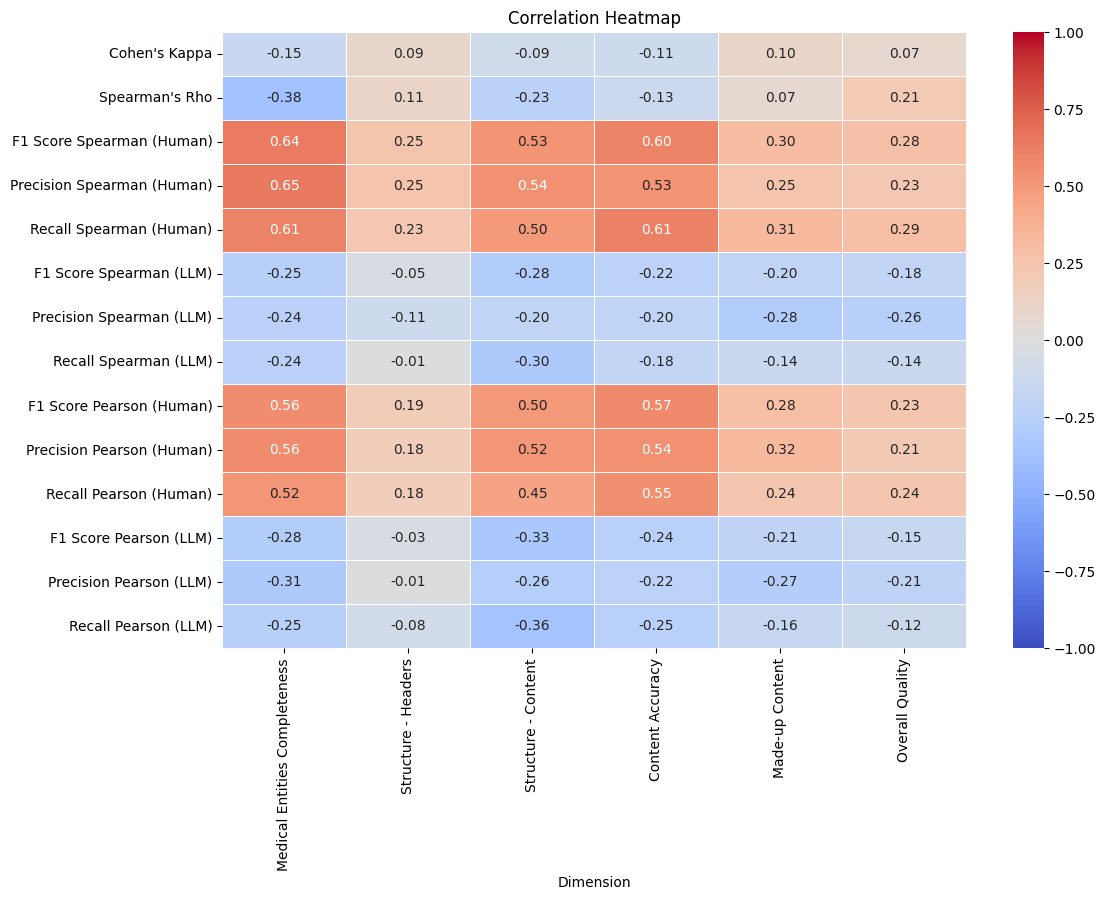

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.metrics import cohen_kappa_score

# Ensure df_comp is your real dataset and cols_score includes the dimension names
# Example: cols_score = ["Medical Entities Completeness", "Structure - Headers", "Structure - Content", "Content Accuracy", "Overall Quality"]

# Extract auto scores (F1, precision, recall)
f1_scores = df_comp["auto_score"].apply(lambda x: eval(x)["f1"]).astype(float).values
precision_scores = df_comp["auto_score"].apply(lambda x: eval(x)["precision"]).astype(float).values
recall_scores = df_comp["auto_score"].apply(lambda x: eval(x)["recall"]).astype(float).values

results = []

for field in cols_score:
    try:
        # Human and LLM scores
        expert_annotations = df_comp[field].astype(float).values
        llm_annotations = df_comp["scores"].apply(lambda x: eval(x)[field]).astype(float).values

        # Agreement metrics
        kappa = cohen_kappa_score(expert_annotations, llm_annotations, weights='linear', labels=[1, 2, 3, 4, 5])
        spearman = scipy.stats.spearmanr(expert_annotations, llm_annotations)

        # Correlation with auto metrics for human
        human_f1_sp = scipy.stats.spearmanr(expert_annotations, f1_scores)
        human_prec_sp = scipy.stats.spearmanr(expert_annotations, precision_scores)
        human_rec_sp = scipy.stats.spearmanr(expert_annotations, recall_scores)

        # Correlation with auto metrics for LLM
        llm_f1_sp = scipy.stats.spearmanr(llm_annotations, f1_scores)
        llm_prec_sp = scipy.stats.spearmanr(llm_annotations, precision_scores)
        llm_rec_sp = scipy.stats.spearmanr(llm_annotations, recall_scores)
        
        # Correlations using Pearson
        human_f1_pear = scipy.stats.pearsonr(expert_annotations, f1_scores)
        human_prec_pear = scipy.stats.pearsonr(expert_annotations, precision_scores)
        human_rec_pear = scipy.stats.pearsonr(expert_annotations, recall_scores)
        
        llm_f1_pear = scipy.stats.pearsonr(llm_annotations, f1_scores)
        llm_prec_pear = scipy.stats.pearsonr(llm_annotations, precision_scores)
        llm_rec_pear = scipy.stats.pearsonr(llm_annotations, recall_scores)
        
        # Append results
        results.append({
            "Dimension": field,
            "Cohen's Kappa": kappa,
            "Spearman's Rho": spearman.correlation,
            "F1 Score Spearman (Human)": human_f1_sp.correlation,
            "Precision Spearman (Human)": human_prec_sp.correlation,
            "Recall Spearman (Human)": human_rec_sp.correlation,
            "F1 Score Spearman (LLM)": llm_f1_sp.correlation,
            "Precision Spearman (LLM)": llm_prec_sp.correlation,
            "Recall Spearman (LLM)": llm_rec_sp.correlation,
            "F1 Score Pearson (Human)": human_f1_pear[0],
            "Precision Pearson (Human)": human_prec_pear[0],
            "Recall Pearson (Human)": human_rec_pear[0],
            "F1 Score Pearson (LLM)": llm_f1_pear[0],
            "Precision Pearson (LLM)": llm_prec_pear[0],
            "Recall Pearson (LLM)": llm_rec_pear[0]
        })
    except Exception as e:
        results.append({
            "Dimension": field,
            "Error": str(e)
        })

# Convert to DataFrame
df_metrics = pd.DataFrame(results)


import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap in coolwarm palette
plt.figure(figsize=(12, 8))
sns.heatmap(df_metrics.set_index("Dimension").T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [35]:
df_metrics_llm_vs_human = df_metrics[["Dimension", "Cohen's Kappa", "Spearman's Rho"]]
df_metrics_llm_vs_human

,Dimension,Cohen's Kappa,Spearman's Rho
0,Medical Entities Completeness,-0.148148,-0.379864
1,Structure - Headers,0.093023,0.109472
2,Structure - Content,-0.094595,-0.231262
3,Content Accuracy,-0.111111,-0.130712
4,Made-up Content,0.102564,0.066295
5,Overall Quality,0.072848,0.209146


In [36]:
df_metrics_auto_vs_human = df_metrics[["Dimension", "F1 Score Spearman (Human)", "Precision Spearman (Human)", "Recall Spearman (Human)"]]
df_metrics_auto_vs_human

,Dimension,F1 Score Spearman (Human),Precision Spearman (Human),Recall Spearman (Human)
0,Medical Entities Completeness,0.637356,0.647942,0.607243
1,Structure - Headers,0.245335,0.253397,0.229558
2,Structure - Content,0.526500,0.543925,0.499906
3,Content Accuracy,0.603556,0.530290,0.612949
4,Made-up Content,0.300261,0.253674,0.314725
5,Overall Quality,0.276592,0.231357,0.285169


In [ ]:
df_p_val

In [37]:
df_metrics_auto_vs_llm = df_metrics[["Dimension", "F1 Score Spearman (LLM)", "Precision Spearman (LLM)", "Recall Spearman (LLM)"]]
df_metrics_auto_vs_llm

,Dimension,F1 Score Spearman (LLM),Precision Spearman (LLM),Recall Spearman (LLM)
0,Medical Entities Completeness,-0.254742,-0.239303,-0.239383
1,Structure - Headers,-0.045316,-0.113291,-0.011333
2,Structure - Content,-0.284177,-0.201507,-0.304946
3,Content Accuracy,-0.220111,-0.196528,-0.184798
4,Made-up Content,-0.197491,-0.281530,-0.138710
5,Overall Quality,-0.180683,-0.256318,-0.138710


(0.0, 6.0)

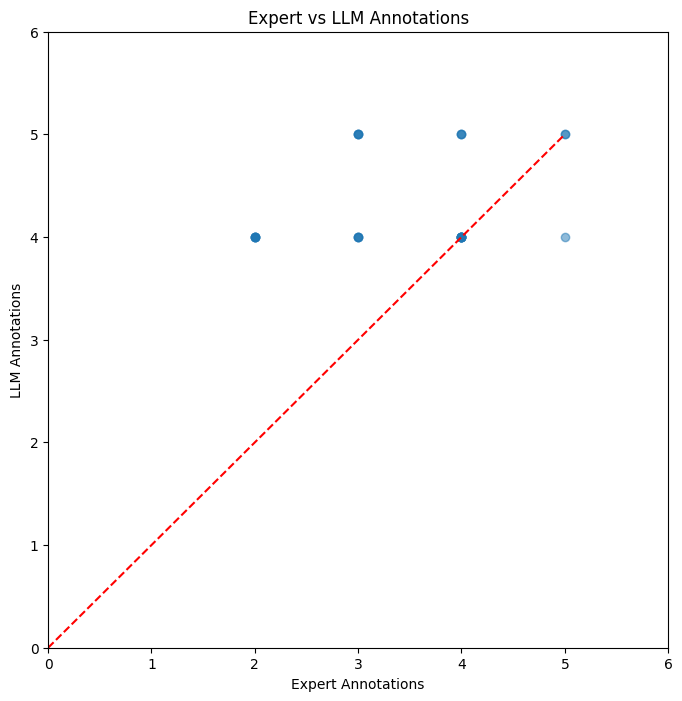

In [24]:
import matplotlib.pyplot as plt

import seaborn as sns
field = 'Overall Quality'

expert_annotations = df_model["human_score"].apply(lambda x: eval(x)[field]).values
llm_annotations = df_model["scores"].apply(lambda x: eval(x)[field]).values

# Scatter plot expert vs llm
plt.figure(figsize=(8, 8))
plt.scatter(expert_annotations, llm_annotations, alpha=0.5)
plt.xlabel("Expert Annotations")
plt.ylabel("LLM Annotations")
plt.title("Expert vs LLM Annotations")
plt.plot([0, 5], [0, 5], 'r--')
plt.xlim(0, 6)
plt.ylim(0, 6)


In [25]:
def expand_and_concat_dicts(df, col):
    """
    Expand a column of dictionaries into separate columns and concatenate with the original dataframe.
    """

    # Expand the column of dictionaries into separate columns
    expanded_df = pd.DataFrame(df[col].apply(eval).tolist())
    # Rename the columns to avoid duplicates
    expanded_df.columns = [f"{col}_{colname}" for colname in expanded_df.columns]
    
    # Concatenate the expanded dataframe with the original dataframe
    concatenated_df = pd.concat([df, expanded_df], axis=1)
    concatenated_df = concatenated_df.drop(columns=[col])
        
    return concatenated_df

df_model_exp = expand_and_concat_dicts(df_model, "human_score")
df_model_exp = expand_and_concat_dicts(df_model_exp, "scores")
df_model_exp = expand_and_concat_dicts(df_model_exp, "feedbacks")
df_model_exp = expand_and_concat_dicts(df_model_exp, "auto_score")
df_model_exp

,filenameid,clinical_case,discharge_summary,human_score_Medical Entities Completeness,human_score_Structure - Headers,human_score_Structure - Content,human_score_Content Accuracy,human_score_Made-up Content,human_score_Overall Quality,human_score_Feedback,...,scores_Overall Quality,feedbacks_Medical Entities Completeness,feedbacks_Structure - Headers,feedbacks_Structure - Content,feedbacks_Content Accuracy,feedbacks_Made-up Content,feedbacks_Overall Quality,auto_score_precision,auto_score_recall,auto_score_f1
0,31668014,A 67‐year‐old man treated with hemodialysis wa...,**Discharge Summary**\n\n**Patient Information...,4,5,4,2,4,2,Diagnosis:** Worsening heart failure with redu...,...,4,The provided discharge summary includes almost...,The discharge summary contains all necessary s...,Content in Discharge Summary Sections Correct,"Overall, the content in the discharge summary ...",The provided discharge summary includes releva...,The response provides clear patient informatio...,0.655172,0.452381,0.535211
1,32864940,"GSA, male, 55 years old, white, forklift opera...",**Discharge Summary**\n\n**Patient Information...,3,5,3,3,4,2,DS miss the duration of symptoms. In section m...,...,4,The provided discharge summary includes most o...,The response contains all the typical sections...,The provided discharge summary accurately cove...,"Overall, the structure and organization of the...",The provided discharge summary includes releva...,The provided discharge summary is comprehensiv...,0.571429,0.510638,0.539326
2,35414581,Patient information\nA woman in her 70s diagno...,**Discharge Summary**\n\n**Patient Information...,4,5,4,5,5,5,DS missed some information about the electroni...,...,4,The response provides a clear structure for as...,The response contains all necessary sections i...,The response provides clear details about the ...,The response provides a clear structure for as...,The response provides a clear structure for as...,The response provides clear details about the ...,0.538462,0.625000,0.578512
3,29399767,A 54-year-old male had had a HeartMate 3™ impl...,**Discharge Summary**\n\n**Patient Information...,5,5,5,4,4,4,The final section Discharge instructions has b...,...,4,The response provides a comprehensive descript...,The response contains all necessary sections i...,The response provides accurate details about t...,"Overall, the content in your discharge summary...",The response provides a clear description of t...,The response provides clear information about ...,0.500000,0.333333,0.400000
4,31056078,"Initial presentation\nA 55-year-old, Caucasian...",**Discharge Summary**\n\n**Patient Information...,2,2,1,3,4,2,In the DS is missing some information about fa...,...,4,The provided discharge summary effectively cha...,The provided discharge summary contains all ne...,The provided discharge summary accurately cove...,The discharge summary provides specific detail...,The provided discharge summary effectively cha...,The provided discharge summary effectively cha...,0.600000,0.466667,0.525000
5,33544806,Clinical history\n\nFour years before the admi...,**Discharge Summary**\n\n**Patient Information...,2,4,1,2,4,3,"The DS is very summarized, with important info...",...,4,The provided discharge summary includes many d...,The DS contains the typical sections such as P...,Information is well structured across all sect...,"Overall, the content in the discharge summary ...",The provided discharge summary includes releva...,The response provides a comprehensive and deta...,0.200000,0.333333,0.250000
6,29899452_1,The patient was a 29-year-old man with PIK3CA ...,**Discharge Summary**\n\n**Patient Information...,4,3,3,3,2,2,DS has confused the diagnoses with the medical...,...,4,The provided discharge summary includes compre...,The discharge summary includes all necessary s...,The provided discharge summary includes all ne...,"Overall, the content in the discharge summary ...",The provided discharge summary includes all ne...,The re

In [26]:
df_model_exp.columns

Index(['filenameid', 'clinical_case', 'discharge_summary',
       'human_score_Medical Entities Completeness',
       'human_score_Structure - Headers', 'human_score_Structure - Content',
       'human_score_Content Accuracy', 'human_score_Made-up Content',
       'human_score_Overall Quality', 'human_score_Feedback',
       'scores_Medical Entities Completeness', 'scores_Structure - Headers',
       'scores_Structure - Content', 'scores_Content Accuracy',
       'scores_Made-up Content', 'scores_Overall Quality',
       'feedbacks_Medical Entities Completeness',
       'feedbacks_Structure - Headers', 'feedbacks_Structure - Content',
       'feedbacks_Content Accuracy', 'feedbacks_Made-up Content',
       'feedbacks_Overall Quality', 'auto_score_precision',
       'auto_score_recall', 'auto_score_f1'],
      dtype='object')

In [27]:
human_cols = ['human_score_Medical Entities Completeness',
       'human_score_Structure - Headers', 'human_score_Structure - Content',
       'human_score_Content Accuracy', 'human_score_Made-up Content',
       'human_score_Overall Quality']
llm_cols = ['scores_Medical Entities Completeness', 'scores_Structure - Headers',
       'scores_Structure - Content', 'scores_Content Accuracy',
       'scores_Made‑up Content', 'scores_Overall Quality']

df_human_ = df_model_exp[human_cols]
df_llm_ = df_model_exp[llm_cols]

ls_corrs = []
for col_human, col_llm in zip(df_human_.columns, df_llm_.columns):
    corr = df_human_[col_human].corr(df_llm_[col_llm])
    ls_corrs.append(corr)
    print(f"{col_human} vs {col_llm}: {corr:.4f}")
    


KeyError: "['scores_Made‑up Content'] not in index"

In [ ]:
disag_med_ent = df_model_exp[(df_model_exp["human_score_Medical Entities Completeness"] < 3)&(df_model_exp["scores_Medical Entities Completeness"] > 3)][["filenameid",
                                                                                                                                                          "human_score_Medical Entities Completeness",
                                                                                                                                                            "scores_Medical Entities Completeness",
                                                                                                                                                            "human_score_Feedback",
                                                                                                                                                            'feedbacks_Medical Entities Completeness',
                                                                                                                                                            'feedbacks_Overall Quality',
                                                                                                                                                            'auto_score_f1']]
disag_med_ent
for index, row in disag_med_ent.iterrows():
    human_score = row["human_score_Medical Entities Completeness"]
    llm_score = row["scores_Medical Entities Completeness"]
    
    print(f"Sample ID: {row['filenameid']}")
    print(f"Human Feedback (Score: {human_score}): {row['human_score_Feedback']}")
    print(f"LLM Feedback (Score: {llm_score}): {row['feedbacks_Overall Quality']}")
    print("\n\n")

Sample ID: 31056078
Human Feedback (Score: 2): In the DS is missing some information about father and brother's disease and her occupacional history. Missing information about symptoms before timeline. 
missing information in diagnostic testing and laboratory results. In overall, there is important information that is not reflected in the DS.
LLM Feedback (Score: 5): The provided discharge summary adequately addresses the initial presentation of the patient, her progression to heart failure with preserved ejection fraction (HFpEF), and the therapeutic approach taken throughout her course. The summary is well-structured and comprehensive, providing a clear timeline and details about the patient's symptoms, medication, vital signs, laboratory results, and diagnostic tests. It also correctly identifies the eventual diagnosis of coronary microvascular disease (CMD) and HFpEF based on the clinical findings and additional investigations. The response exhibits an understanding of the topic an

In [ ]:
disag_med_ent

,filenameid,human_score_Medical Entities Completeness,scores_Medical Entities Completeness,human_score_Feedback,feedbacks_Medical Entities Completeness,feedbacks_Overall Quality,auto_score_f1
4,31056078,2,5,In the DS is missing some information about fa...,"Upon reviewing the provided discharge summary,...",The provided discharge summary adequately addr...,0.525000
9,33782774,2,4,"The DS is very summarized, with important info...",The discharge summary included almost all the ...,The overall quality of the summary is satisfac...,0.535211
10,38866580,1,4,There’s an important amount of information in ...,"Upon review, it is evident that the discharge ...",The response successfully captures the overall...,0.408163


In [ ]:
field = 'Overall Quality'
threshold = 3
disag_med_ent = df_model_exp[(df_model_exp[f"human_score_{field}"] < threshold)&(df_model_exp[f"scores_{field}"] > threshold)][["filenameid",
                                                                                                                                f"human_score_{field}",
                                                                                                                                f"scores_{field}",
                                                                                                                                "human_score_Feedback",
                                                                                                                                f'feedbacks_{field}',
                                                                                                                                'auto_score_f1']]
disag_med_ent
for index, row in disag_med_ent.iterrows():
    human_score = row[f"human_score_{field}"]
    llm_score = row[f"scores_{field}"]
    
    print(f"Sample ID: {row['filenameid']}")
    print(f"F1-Score: {row['auto_score_f1']:.2f}")
    print(f"Human Feedback (Score: {human_score}):\n {row['human_score_Feedback']}\n")
    print(f"LLM Feedback (Score: {llm_score}):\n {row['feedbacks_Overall Quality']}\n")
    print("\n\n")

Sample ID: 31668014
F1-Score: 0.54
Human Feedback (Score: 2):
 Diagnosis:** Worsening heart failure with reduced ejection fraction (EF). Is missing that patient was on hemodialysis
Severe left ventricular (LV) dysfunction with EF of 35% and high filling pressures. ( Is 34% not 35%) 
- Moderate renal impairment with estimated glomerular filtration rate (eGFR) of 40 ml/min per 1.73 m². ( is 52ml/min not 40 ml/min)40ml/min is in another paragraph
There's important information that is missing related to heart failure. 

LLM Feedback (Score: 5):
 The provided response comprehensively covers all the key elements from the original medical history and patient outcome. It details the patient's medical history, the treatment plan, and the progression of the patient's condition over time, which are crucial aspects for a discharge summary. Furthermore, it provides clear and concise instructions for post-discharge care, such as adhering to medications, monitoring blood pressure, and attending follo

In [ ]:
field = 'Overall Quality'
threshold = 3
disag_med_ent = df_model_exp[(df_model_exp[f"human_score_{field}"] > threshold)&(df_model_exp[f"scores_{field}"] > threshold)][["filenameid",
                                                                                                                                f"human_score_{field}",
                                                                                                                                f"scores_{field}",
                                                                                                                                "human_score_Feedback",
                                                                                                                                f'feedbacks_{field}',
                                                                                                                                'auto_score_f1']]
disag_med_ent
for index, row in disag_med_ent.iterrows():
    human_score = row[f"human_score_{field}"]
    llm_score = row[f"scores_{field}"]
    
    print(f"Sample ID: {row['filenameid']}")
    print(f"F1-Score: {row['auto_score_f1']:.2f}")
    print(f"Human Feedback (Score: {human_score}):\n {row['human_score_Feedback']}\n")
    print(f"LLM Feedback (Score: {llm_score}):\n {row['feedbacks_Overall Quality']}\n")
    print("\n\n")

Sample ID: 35414581
F1-Score: 0.58
Human Feedback (Score: 5):
 DS missed some information about the electronic device, but it's not relevant for the clinical case 

LLM Feedback (Score: 4):
 The provided response is well-structured and maintains accuracy, fulfilling most of the criteria outlined in the score rubric. It begins with a clear summary of the patient's demographics, diagnoses, and comorbidities, effectively laying out the context of the patient's treatment and the importance of the Heartfelt device.

It proceeds to detail the device's operation and functionality, including the rate of image capture and the process by which alerts are generated and transmitted. This information is crucial for understanding the significance of the device in managing the patient's heart failure.

The timeline of events, from the installation of the device to the patient's first and second hospitalizations, is presented in a logical order. Each step in the patient's care journey is highlighted, 